In [231]:
import pandas as pd
import numpy as np




In [232]:

X = [[0.1,0.1],     [4,4],[4,4.5],[4.5, 4.7],[4.6,4.4],[4.3,4.5],[4.3,5],
    [2,2],[2.3,2.3],[2.5,2.5],[2.6,2.2],[2,2.5],
    [4.3,0.3],[4.4,-0.3],[4.2,-0.5],[4.6,0.3],[4,0],
    [-2,-2],[-2.2,-2.3],[-1.8,-2],[-2.5,-2.6],[-2.3,-2],
     [-1,3],[-1.2,3.2],[-1.1,3.4],[-.98,2.9],[-1.4,3.2]
    ]

x = []
y = []
for i in range(len(X)):
    x.append(X[i][0])
    y.append(X[i][1])


In [233]:
import plotly.express as px
fig = px.scatter(x= x, y= y )
fig.show()

In [234]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
model1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model1 = model1.fit(X)


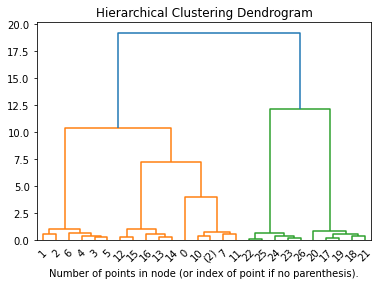

In [235]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model1, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [236]:
# setting distance_threshold=0 ensures we compute the full tree.
model1 = AgglomerativeClustering(distance_threshold=2.5, n_clusters=None)

model1 = model1.fit(X)

In [237]:
labels = model1.labels_.tolist()
nocluster = set(labels)
totalcluster = len(nocluster)
totalcluster

6

In [238]:
cluster_dict = {}

i = 0
for i in range(len(labels)):
    if labels[i] not in cluster_dict.keys():
         cluster_dict[labels[i]] = [i]
    else:
          cluster_dict[labels[i]].append(i)
    i+=1

In [239]:
for i in range(totalcluster):
    print(len(cluster_dict[i]))

5
6
5
5
5
1


In [240]:
outlier_cluster = []
for i in range(totalcluster):
    if len(cluster_dict[i]) == 1:
        outlier_cluster.append(i)
    
print(outlier_cluster)

[5]


In [241]:
outlier_cluster[0]

5

In [242]:
cluster_mean = np.zeros((totalcluster, 2))
cluster_mean.shape

(6, 2)

In [243]:
cluster_dict[1][0]
X[1]

[4, 4]

In [244]:


for i in range(totalcluster):
    l = []
    for j in range(len(cluster_dict[i])):
        l.append(X[cluster_dict[i][j]])
    print(l)    
    cluster_mean[i] = np.mean(l, axis=0)
    


[[4.3, 0.3], [4.4, -0.3], [4.2, -0.5], [4.6, 0.3], [4, 0]]
[[4, 4], [4, 4.5], [4.5, 4.7], [4.6, 4.4], [4.3, 4.5], [4.3, 5]]
[[-1, 3], [-1.2, 3.2], [-1.1, 3.4], [-0.98, 2.9], [-1.4, 3.2]]
[[-2, -2], [-2.2, -2.3], [-1.8, -2], [-2.5, -2.6], [-2.3, -2]]
[[2, 2], [2.3, 2.3], [2.5, 2.5], [2.6, 2.2], [2, 2.5]]
[[0.1, 0.1]]


In [245]:
cluster_mean[4]

array([2.28, 2.3 ])

In [246]:
from scipy.spatial import distance
cluster_mean[1]
distance.cosine(cluster_mean[1],cluster_mean[3])

1.9997601897376596

In [260]:
# outlier need to change here for differnet experiment

from scipy.spatial import distance
cluster_distance = []
for i in range(totalcluster):
    if i == outlier_cluster[0]:
        continue
    cluster_distance.append((distance.euclidean(cluster_mean[outlier_cluster[0]], cluster_mean[i]),outlier_cluster[0], i))
print('Euclidian distance, Outlire, Other cluster')
cluster_distance

Euclidian distance, Outlire, Other cluster


[(4.202332685545017, 5, 0),
 (6.08335616434072, 5, 1),
 (3.2816605552677136, 5, 2),
 (3.210295936514265, 5, 3),
 (3.0971599894096524, 5, 4)]

In [262]:
cluster_distance.sort(key=lambda y: y[0])
cluster_distance = cluster_distance[:5]
print('Euclidian distance, Outlire, Other cluster')
cluster_distance

Euclidian distance, Outlire, Other cluster


[(3.0971599894096524, 5, 4),
 (3.210295936514265, 5, 3),
 (3.2816605552677136, 5, 2),
 (4.202332685545017, 5, 0),
 (6.08335616434072, 5, 1)]

In [250]:
translate_outlier = cluster_mean[cluster_distance[0][1]] + (- cluster_mean[cluster_distance[0][2]])
translate_cluster = cluster_mean[cluster_distance[4][2]] + (- cluster_mean[cluster_distance[0][2]])
cos_dist = distance.cosine(translate_outlier, translate_cluster)
cos_dist

1.99894477174406

In [265]:
  def findCandidateClusters(k_nearest_cluster):
    closestCluster = k_nearest_cluster[0][2]
    closestDistance = k_nearest_cluster[0][0]
    candidateCluster = []
    rejectedCluster = []
    dist = distance.euclidean(cluster_mean[closestCluster],cluster_mean[k_nearest_cluster[0][2]])
#     candidateCluster.append(k_nearest_cluster[0])
    for i in k_nearest_cluster:
        if i in rejectedCluster:
            continue
        for j in k_nearest_cluster:
            if j == i: continue
            origin = cluster_mean[i[2]] + (- cluster_mean[i[2]])
            translate_outlier = cluster_mean[i[1]] + (- cluster_mean[i[2]])
            translate_cluster = cluster_mean[j[2]] + (- cluster_mean[i[2]])
            cos_dist = distance.cosine(translate_outlier, translate_cluster)
            print(cos_dist)
            print(j)
            if cos_dist < .8 :
                if j in candidateCluster:
                    continue
                candidateCluster.append(j)
            else:
                rejectedCluster.append(j)
                if j in candidateCluster:
                    
                    print(j)
                    print('is included')
                    candidateCluster.remove(j)   

    return  candidateCluster   

In [266]:
neighborCluster = findCandidateClusters(cluster_distance)
neighborCluster

3.3540863420000733e-09
(3.210295936514265, 5, 3)
0.48610907100456413
(3.2816605552677136, 5, 2)
3.121845337794582e-09
(3.0971599894096524, 5, 4)
0.16952545336477254
(3.2816605552677136, 5, 2)
0.41305309648807564
(3.0971599894096524, 5, 4)
0.1615266124918976
(3.210295936514265, 5, 3)


[(3.210295936514265, 5, 3),
 (3.2816605552677136, 5, 2),
 (3.0971599894096524, 5, 4)]

In [226]:
k_nearest_cluster = list(zip(*cluster_distance[:5]))[2]
k_nearest_cluster

TypeError: 'list' object is not callable

In [227]:
def findNearestObjectOfClusters(k_nearest_cluster):
    distance_all_cluster = []
    nearestObjects = []
    object_distance = []
    for j in range(len(k_nearest_cluster)):
        for i in range(len(cluster_dict[k_nearest_cluster[j]])):
            object_distance.append((distance.euclidean(cluster_mean[outlier_cluster[0]], X.iloc[cluster_dict[k_nearest_cluster[j]][i]]),outlier_cluster[0], k_nearest_cluster[j],  cluster_dict[k_nearest_cluster[j]][i]))
        #distance_all_cluster.append(object_distance)
        nearestObjects.append(min(object_distance, key=lambda tup: tup[0]))
        object_distance = []
    return  nearestObjects   

In [228]:
nearestObjects = findNearestObjectOfClusters(k_nearest_cluster)
nearestObjects.sort(key=lambda y: y[0])
nearestObjects

NameError: name 'k_nearest_cluster' is not defined

In [ ]:
from scipy.spatial import distance
for i in range(100):
    for j in range(100):
        print(distance.cosine(X[i], X[j]))
    print('new loop')    

In [ ]:
def findCandidateObjectOfClusters(k_nearest_objects):
    closestObject = k_nearest_objects[0][3]
    closestDistance = k_nearest_objects[0][0]
    candidateObjects = []
    candidateObjects.append(k_nearest_objects[0])
    for j in range(len(k_nearest_objects)):
        #if j == 0: continue
        dist = distance.euclidean(X.iloc[closestObject], X.iloc[k_nearest_objects[j][3]])
        cos_dist = distance.cosine(X.iloc[closestObject], X.iloc[k_nearest_objects[j][3]])
        print(dist)
        if cos_dist >= .6 and dist  >=  closestDistance*.8 :
            candidateObjects.append(k_nearest_objects[j])
    return  candidateObjects   

In [ ]:
neighborObjects = findCandidateObjectOfClusters(nearestObjects)
neighborObjects